In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import gzip

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import MCS
from rdkit.Chem import AllChem

C:\Users\Wyss User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
clusters = []
infile = open('output_clusters10.csv','r')
for line in infile:
    clusters.append(line.strip().split(','))
infile.close()
#clusters

In [5]:
mols = []

infile = open('output_mols10.csv','r')
for line in infile:
    mols.append(line.strip().split(','))

infile.close()
#mols

In [6]:
len(clusters[0])

3870

In [7]:
pos=[(i, mols.index('67891773')) for i, mols in enumerate(mols) if '67891773' in mols]

In [8]:
pos

[(47352, 1)]

In [9]:
pos2=[(i, clusters.index('47352')) for i, clusters in enumerate(clusters) if '47352' in clusters]

In [10]:
pos2

[(0, 0)]

In [11]:
member=clusters[pos2[0][0]]

In [ ]:
len(member)

In [12]:
member[:5]

['47352', '21', '57', '74', '76']

In [13]:
mols[int(member[0])][1]

'67891773'

In [32]:
mols[int(member[1])][1]

'10012204'

In [33]:
member_cid=[]
for j in range(0, len(member)):
    member_cid.append(mols[int(member[j])][1]) 
member_cid

['67891773',
 '10012204',
 '10034664',
 '10035228',
 '10035377',
 '10036241',
 '10057479',
 '10057652',
 '10077169',
 '10080379',
 '10080440',
 '10080529',
 '10080654',
 '100900',
 '10103201',
 '10103293',
 '10125936',
 '10130210',
 '10130220',
 '10130228',
 '10130397',
 '10154203',
 '10154314',
 '101552',
 '101554',
 '10156843',
 '10156843',
 '101714',
 '101748',
 '10176209',
 '10176372',
 '101798',
 '10198045',
 '102169',
 '102191',
 '10219674',
 '10219768',
 '10236867',
 '10236867',
 '10240836',
 '10261075',
 '10261128',
 '10285783',
 '10290771',
 '103023',
 '10313255',
 '10313344',
 '10313507',
 '10329421',
 '10331170',
 '10351682',
 '10357',
 '10374739',
 '10374743',
 '10374941',
 '10396871',
 '10398671',
 '10419208',
 '10419222',
 '10419222',
 '10419469',
 '10419496',
 '10420197',
 '10441837',
 '10441837',
 '10450027',
 '104501',
 '10464332',
 '10464640',
 '10464871',
 '10464897',
 '10486985',
 '10486985',
 '10487211',
 '10487973',
 '10510841',
 '10510978',
 '10511764',
 '1053462

In [20]:
type(mols)

list

In [40]:
df_member_cid=pd.DataFrame(member_cid, columns=['CID'])

In [41]:
df_member_cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 1 columns):
CID    3870 non-null object
dtypes: object(1)
memory usage: 30.3+ KB


In [46]:
## downloaded from Pubchem 
## "ChemBridge"[SourceName]
#Sm = pd.read_table("pccompound_result.txt", names=['CID'])
Sm = pd.read_table("pccompound_result_ChemBridge_cid.txt", names=['CID'])

In [47]:
Sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605712 entries, 0 to 1605711
Data columns (total 1 columns):
CID    1605712 non-null int64
dtypes: int64(1)
memory usage: 12.3 MB


In [48]:
Sm['CID']=Sm['CID'].astype(str)

In [49]:
Sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605712 entries, 0 to 1605711
Data columns (total 1 columns):
CID    1605712 non-null object
dtypes: object(1)
memory usage: 12.3+ MB


In [50]:
### 67891773_Chembridge
set(Sm['CID']).intersection(set(df_member_cid['CID']))

{'115056', '2827465', '318275', '739'}

In [ ]:
### so far so good

In [90]:
df_member_cid.head()

,CID
0,67891773
1,10012204
2,10034664
3,10035228
4,10035377


In [91]:
 member_smiles=pd.merge(Sm, df_member_cid, on='CID')

In [127]:
member_smiles.to_csv('member_smiles_67891773.csv')

In [ ]:
smiles

In [92]:
mol_smiles = []
count = 0
for i in range(0,len(member_smiles)):    
    m = Chem.MolFromSmiles(member_smiles.CanonicalSMILES[i])
    mol_smiles.append((m, member_smiles.CID[i]),member_smiles.CanonicalSMILES[i])


In [93]:
mol_smiles[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1861a8ccc10>, '10012204'),
 (<rdkit.Chem.rdchem.Mol at 0x186112f14e0>, '10034664'),
 (<rdkit.Chem.rdchem.Mol at 0x186112f1530>, '10035228'),
 (<rdkit.Chem.rdchem.Mol at 0x186112f1580>, '10035377'),
 (<rdkit.Chem.rdchem.Mol at 0x186112f15d0>, '10036241')]

In [119]:
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
# calculate fingerprints
fps = []
for m,idx in mol_smiles:
    fps.append(Chem.RDKFingerprint(m, maxPath=5))
# generate distance matrix
dist_matrix = []
num_fps = len(fps)
for i in range(1, num_fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
    dist_matrix.extend([1-x for x in similarities])
# cluster
clusters_second = Butina.ClusterData(dist_matrix, num_fps, 0.2, isDistData=True) # distance cutoff = 0.3
print ("number of clusters =", len(clusters_second))
num_clust_g3 = len([c for c in clusters_second if len(c) > 20])
print ("number of clusters with more than 20 compounds =", num_clust_g3)

number of clusters = 212
number of clusters with more than 20 compounds = 33


In [120]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# take the cluster centre of each cluster
final_mols = [mol_smiles[c[0]] for c in clusters_second]


In [121]:
len(final_mols)

212

In [122]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# take the cluster centre of each cluster
center_mols = [mol_smiles[c[0]] for c in clusters_second if len(c) > 20]


In [123]:
center_mols

[(<rdkit.Chem.rdchem.Mol at 0x18614b5c3a0>, '9990201'),
 (<rdkit.Chem.rdchem.Mol at 0x186148fc4e0>, '60040628'),
 (<rdkit.Chem.rdchem.Mol at 0x186148e0d00>, '44245358'),
 (<rdkit.Chem.rdchem.Mol at 0x186148f0cb0>, '59848157'),
 (<rdkit.Chem.rdchem.Mol at 0x186148d69e0>, '5324484'),
 (<rdkit.Chem.rdchem.Mol at 0x18614b55e90>, '90998442'),
 (<rdkit.Chem.rdchem.Mol at 0x18614b557b0>, '90473893'),
 (<rdkit.Chem.rdchem.Mol at 0x186138759e0>, '12844601'),
 (<rdkit.Chem.rdchem.Mol at 0x18614b4e670>, '71683395'),
 (<rdkit.Chem.rdchem.Mol at 0x18614b7cc10>, '66574199'),
 (<rdkit.Chem.rdchem.Mol at 0x18614b50170>, '71777249'),
 (<rdkit.Chem.rdchem.Mol at 0x18614b50800>, '736'),
 (<rdkit.Chem.rdchem.Mol at 0x18613875120>, '12671579'),
 (<rdkit.Chem.rdchem.Mol at 0x18613871990>, '25228160'),
 (<rdkit.Chem.rdchem.Mol at 0x18613855620>, '19699685'),
 (<rdkit.Chem.rdchem.Mol at 0x186148e0e90>, '44282553'),
 (<rdkit.Chem.rdchem.Mol at 0x18613863940>, '22862057'),
 (<rdkit.Chem.rdchem.Mol at 0x18613855

In [124]:
len(center_mols)

33

In [128]:
center_mols_cid=[]
for i in range(0, len(center_mols)):
    center_mols_cid.append(center_mols[i][1])

In [129]:
center_mols_cid

['9990201',
 '60040628',
 '44245358',
 '59848157',
 '5324484',
 '90998442',
 '90473893',
 '12844601',
 '71683395',
 '66574199',
 '71777249',
 '736',
 '12671579',
 '25228160',
 '19699685',
 '44282553',
 '22862057',
 '20515084',
 '91184344',
 '542424',
 '9920539',
 '11744768',
 '80167144',
 '55252504',
 '10630886',
 '79373586',
 '7059639',
 '4243512',
 '79619013',
 '68387531',
 '90803',
 '5459834',
 '68563866']

In [130]:
df_center_mols_cid=pd.DataFrame(center_mols_cid)
df_center_mols_cid.columns=["CID"]

In [132]:
center_mols_smiles=pd.merge(Sm, df_center_mols_cid, on='CID')

In [135]:
center_mols_smiles

,CID,CanonicalSMILES
0,10630886,C(C(CO)OCC(CO)O)O
1,11744768,CCC1(C(O1)C(C)O)CO
2,12671579,CC(C1C(O1)CO)O
3,12844601,CC1(OC2CCC(C2O1)O)C
4,19699685,CC1COC(C(C1OC)O)CO
5,20515084,CC(C(CO)OCCO)O
6,22862057,C1C(C(C(C(O1)CO)O)O)N
7,25228160,C(C(C1C(C(C(O1)O)O)O)O)F
8,25228160,C(C(C1C(C(C(O1)O)O)O)O)F
9,4243512,C(C1C(C(C(O1)C=O)O)O)O


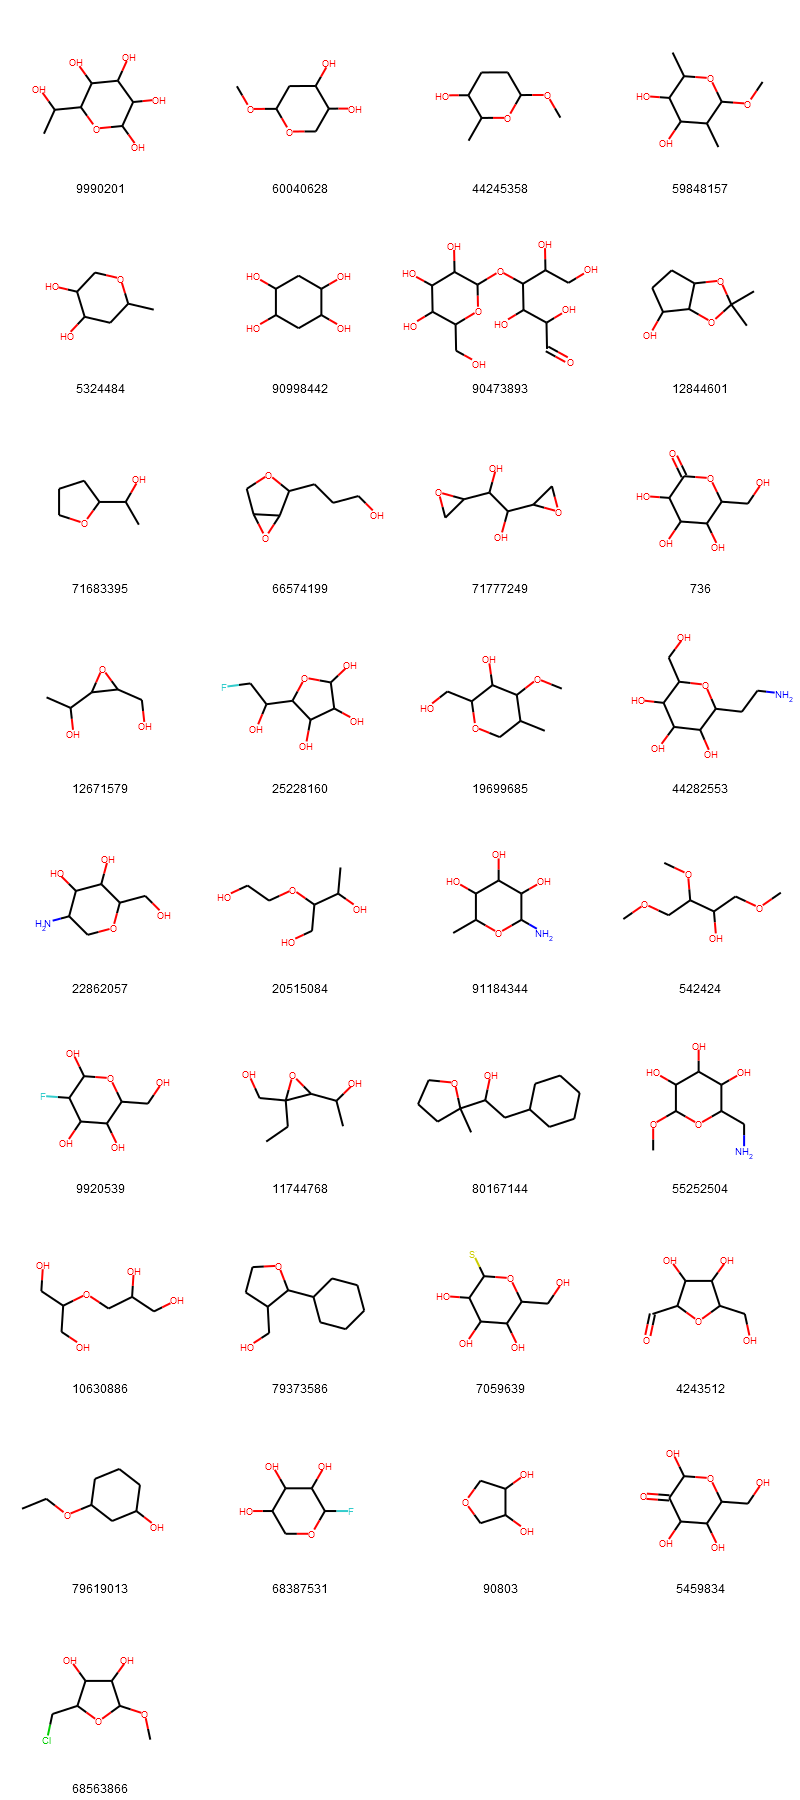

In [125]:
Draw.MolsToGridImage([m[0] for m in center_mols], 
                     legends=[m[1] for m in center_mols], 
                     molsPerRow=4)